In [2]:
import pandas as pd
import seaborn as sns
import glob, os
import numpy as np

In [3]:
df_input = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "data/rand/*.csv"))))
df_input['abs_grad'] = df_input['grad'].map(lambda x: abs(x))

In [4]:
df_input.groupby(['l', 'n']).agg({'abs_grad': ['mean', 'std']})

abs_grad          
           mean       std
l   n                    
10  4  0.271040  0.347101
    6  0.150695  0.229249
20  4  0.273273  0.231741
    6  0.102664  0.144608
30  4  0.264239  0.216875
    6  0.132305  0.132230
40  4  0.268508  0.216970
    6  0.131657  0.114644
50  4  0.262222  0.216650
    6  0.134497  0.113208
60  4  0.276153  0.212559
    6  0.144645  0.116330
70  4  0.271469  0.216207
    6  0.135470  0.107483
80  4  0.273145  0.211658
90  4  0.268546  0.214733
100 4  0.274879  0.207945
110 4  0.270726  0.209313
120 4  0.304902  0.216610
130 4  0.274156  0.210345
140 4  0.272315  0.211142
150 4  0.271992  0.208793
160 4  0.267503  0.210263
170 4  0.271084  0.207906
180 4  0.270884  0.205166
190 4  0.269317  0.203963

In [27]:
df = df_input.pivot_table(values='abs_grad', index=['l', 'n'], aggfunc=np.var).reset_index()

In [28]:
df.head()

,l,n,abs_grad
0,10,4,0.120479
1,10,6,0.052555
2,20,4,0.053704
3,20,6,0.020911
4,30,4,0.047035


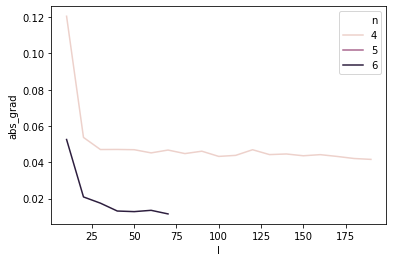

In [29]:
sns.lineplot(data=df, x='l', hue='n', y='abs_grad')